In [1]:
from sklearn.datasets import load_iris
import pandas as pd
iris = load_iris()
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["target"] = iris["target"]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [2]:
from sklearn.model_selection import train_test_split

# train_test_split -> (特徵90%, 特徵10%, 目標90%, 目標10%)
x_train, x_test, y_train, y_test = train_test_split(df.drop(["target"], axis=1), df["target"], test_size=0.1)
# axis=0是橫列 axis=1是直行

In [3]:
# 做公式(fit)
# 在你已知幾種的時候，K就直接選，EX:n_clusters=3
from sklearn.cluster import KMeans
clu = KMeans(n_clusters=3)
clu.fit(x_train)
# k-means++ = 一開始隨機選的點盡可能地遠

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [4]:
clu.labels_
# 這裡的0, 1, 2不按照順序，隨機的，所以下面的正確率沒有意義

array([0, 1, 1, 2, 1, 0, 2, 0, 1, 0, 2, 1, 1, 2, 1, 2, 1, 2, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 2, 1, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 2, 1,
       2, 0, 2, 2, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 0, 1, 1, 2, 0, 1,
       1, 1, 1, 0, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 0, 2, 2, 0, 1, 1, 1, 2,
       0, 1, 0, 2, 0, 2, 0, 2, 1, 0, 1, 1, 0, 1, 2, 1, 2, 0, 0, 1, 2, 2,
       2, 0, 0, 2, 1, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 2, 0, 1, 2, 1,
       1, 2, 2], dtype=int32)

In [5]:
# 驗證一下公式的好壞
# 預測(predict)
print("預測結果：", list(clu.predict(x_test)))
print("真正結果：", list(y_test))
# 衡量方法（sklearn.metrics）
from sklearn.metrics import accuracy_score
score = accuracy_score(clu.predict(x_test), y_test)
print("正確率：", score)

預測結果： [1, 1, 0, 0, 0, 2, 2, 1, 1, 2, 0, 2, 1, 2, 0]
真正結果： [1, 1, 0, 0, 0, 2, 2, 2, 1, 2, 0, 2, 1, 2, 0]
正確率： 0.9333333333333333


In [6]:
from sklearn.metrics import silhouette_score
x = df.drop(["target"], axis=1)
plotx = []
ploty = []
for k in range(2, 6):
    clu = KMeans(n_clusters=k)
    clu.fit(x)
    s = silhouette_score(x, clu.labels_)
    plotx.append(k) # 第二種專屬技能：不要設定回去
    ploty.append(s)
print("K值：", plotx)
print("Score：", ploty)

K值： [2, 3, 4, 5]
Score： [0.681046169211746, 0.5528190123564091, 0.4980505049972867, 0.4887488870931048]


Text(0, 0.5, 'Score')

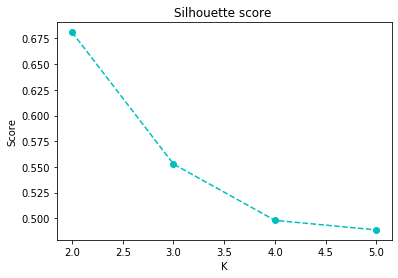

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(plotx, ploty, "co--") # co--：青色、虛線
plt.title("Silhouette score ")
plt.xlabel("K")
plt.ylabel("Score")
